In [29]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType
import matplotlib.pyplot as plt

In [4]:
# Створення сесії Spark
spark = SparkSession.builder.appName("AmazonBooksAnalysis").getOrCreate()


df = spark.read.csv("bestsellers_with_categories.csv", header=True)
df.show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

In [5]:
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Author: string (nullable = true)
 |-- User Rating: string (nullable = true)
 |-- Reviews: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Genre: string (nullable = true)


In [6]:
df.dtypes

[('Name', 'string'),
 ('Author', 'string'),
 ('User Rating', 'string'),
 ('Reviews', 'string'),
 ('Price', 'string'),
 ('Year', 'string'),
 ('Genre', 'string')]

In [7]:
df.show(5)

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
+--------------------+--------------------+-----------+-------+-----+----+-----------+


In [8]:
df.first()

Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating='4.7', Reviews='17350', Price='8', Year='2016', Genre='Non Fiction')

In [9]:
df.describe().show()

23/11/23 20:26:01 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|summary|                Name|          Author|        User Rating|           Reviews|             Price|              Year|      Genre|
+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|  count|                 550|             550|                550|               550|               550|               550|        550|
|   mean|                NULL|            NULL|  4.618363636363641|11953.281818181818|              13.1|            2014.0|       NULL|
| stddev|                NULL|            NULL|0.22698036502519656|11731.132017431892|10.842261978422364|3.1651563841692782|       NULL|
|    min|"The Plant Parado...|Abraham Verghese|                3.3|             10009|                 0|              2009|    Fiction|
|    max|You Are a Badass:...|    Zhi Gan

In [10]:
df.columns

['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']

In [11]:
df.count()

550

In [14]:
df = df.na.fill(0)
df = df.withColumn("reviews", col("reviews").cast(DoubleType()))
df = df.withColumn("Price", col("Price").cast(DoubleType()))

df.show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|17350.0|  8.0|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6| 2052.0| 22.0|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|18979.0| 15.0|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|21424.0|  6.0|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8| 7665.0| 12.0|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|12643.0| 11.0|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|19735.0| 30.0|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|19699.0| 15.0|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

In [28]:
for column in df.columns:
    if any(type(data_type) in (DoubleType, int) for data_type in df.select(column).dtypes):
        mean_value = df.agg({column: "mean"}).collect()[0][0]
        df = df.na.fill(mean_value, [column])
        df = df.withColumn(column, col(column).cast(DoubleType()))

In [25]:
df = df.toDF('name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre')
df

DataFrame[name: string, author: string, user_rating: string, reviews: double, price: double, year: string, genre: string]

In [26]:
df = df.toDF('name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre')
df.show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                name|              author|user_rating|reviews|price|year|      genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|17350.0|  8.0|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6| 2052.0| 22.0|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|18979.0| 15.0|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|21424.0|  6.0|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8| 7665.0| 12.0|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|12643.0| 11.0|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|19735.0| 30.0|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|19699.0| 15.0|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

In [18]:
highest_rated_author = df.orderBy(col("user_rating").desc()).first().author
highest_rated_author

'Bill Martin Jr.'

In [19]:
lowest_rated_author = df.orderBy(col("user_rating").asc()).first().author
lowest_rated_author

'J.K. Rowling'

In [20]:
most_reviewed_author = df.orderBy(col("reviews").desc()).first().author
most_reviewed_author

'Delia Owens'

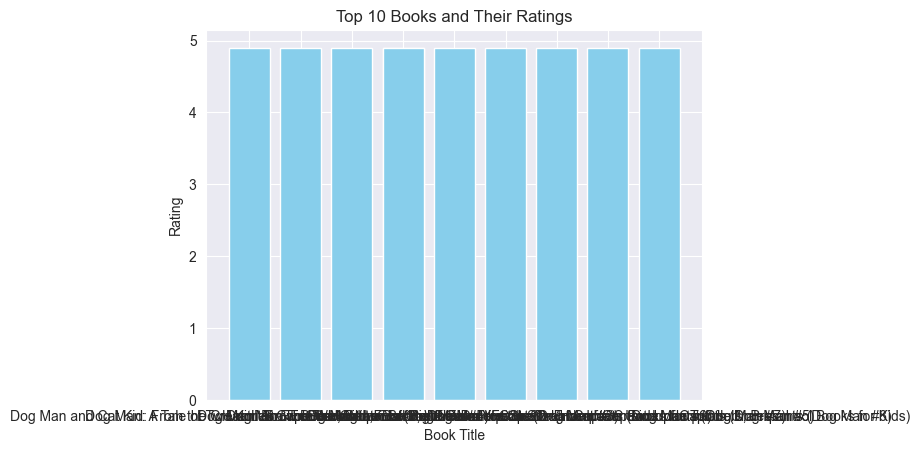

In [32]:
top_10_books = df.orderBy(col("user_rating").desc()).limit(10)
# Збираємо рейтинги та назви книг з DataFrame
data = top_10_books.select("name", "user_rating").rdd.collect()

# Розділяємо дані на імена та рейтинги
name = [row.name for row in data]
ratings = [float(row.user_rating) for row in data]

# Створюємо гістограму з іменами книг на осі x
plt.bar(name, ratings, color='skyblue')

# Додаємо заголовок та підписи осей
plt.title('Top 10 Books and Their Ratings')
plt.xlabel('Book Title')
plt.ylabel('Rating')

# Повертаємо гістограму
plt.show()

In [22]:
correlation_matrix = df.select('user_rating', 'reviews', 'price').toPandas().corr()
correlation_matrix

,user_rating,reviews,price
user_rating,1.000000,-0.001729,-0.133086
reviews,-0.001729,1.000000,-0.109182
price,-0.133086,-0.109182,1.000000


In [33]:
# Команда для зупинення PySpark
spark.stop()